Current working directory: E:\Project\DS\Mini Projects\Sales Analysis
Please ensure you run the script from the project root (e.g., 'python main_analysis.py' from 'Sales Analysis/').
Starting Supermarket Sales Analysis (Adapted for new dataset)...
Dataset loaded successfully from E:\Project\DS\Mini Projects\Sales Analysis\data\Supermarket Sales Data.csv.

--- Data Info Before Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB

Missing values before cleaning:
Store ID                0
Store_Area              0
Items_Available         0
Daily_Custo

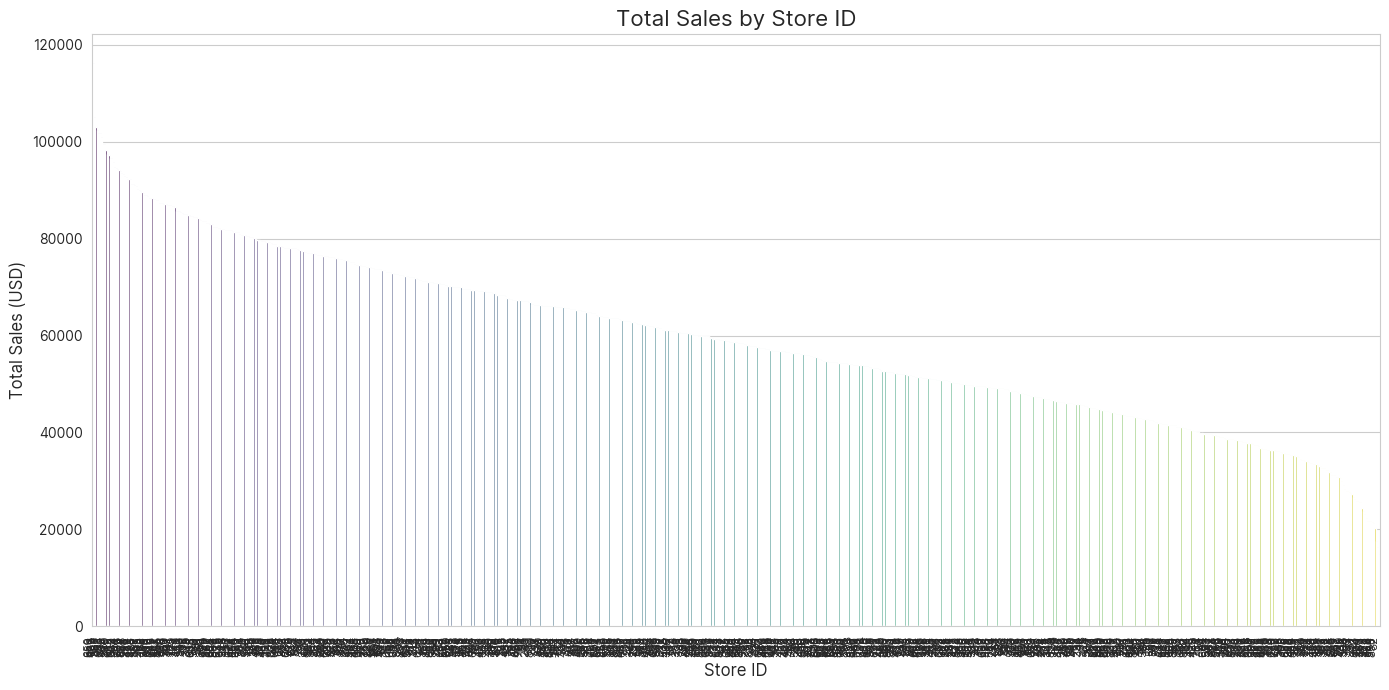


--- Q2: Sales by Store Area ---
Store_Area
1440    362330
1539    345940
1439    341400
1513    311570
1458    300200
Name: Store_Sales, dtype: int64


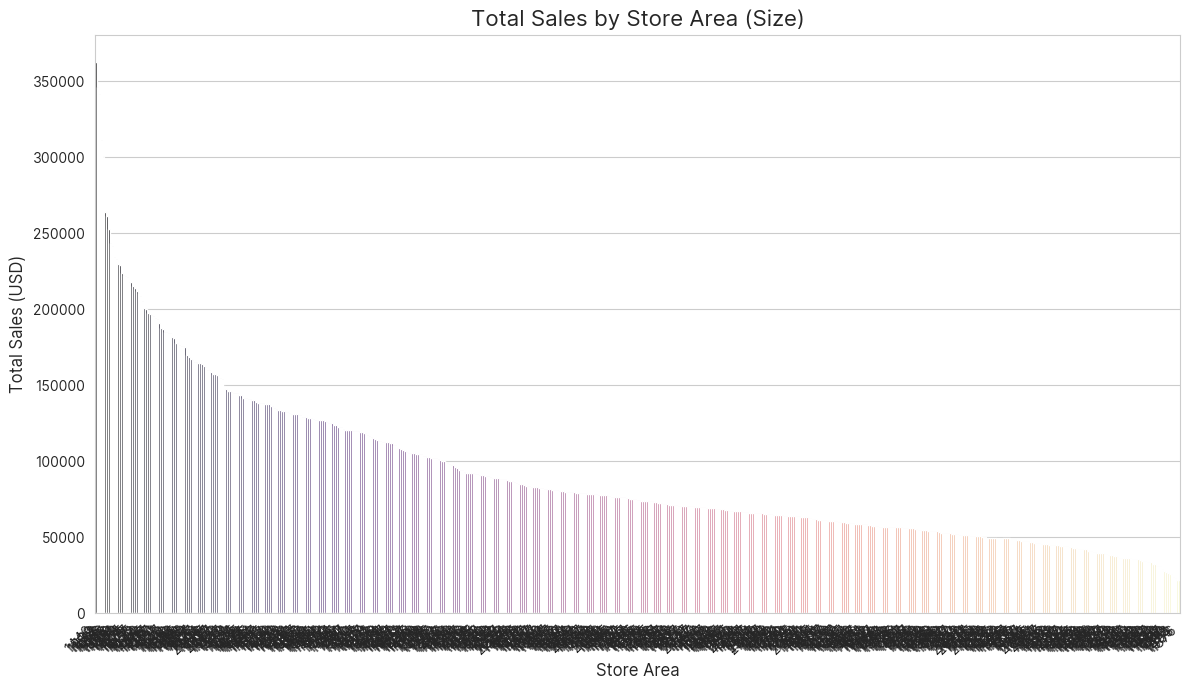


--- Q4: Top 5 Stores by Sales ---
Store ID
650    116320
869    105150
433    102920
409    102310
759    101820
Name: Store_Sales, dtype: int64


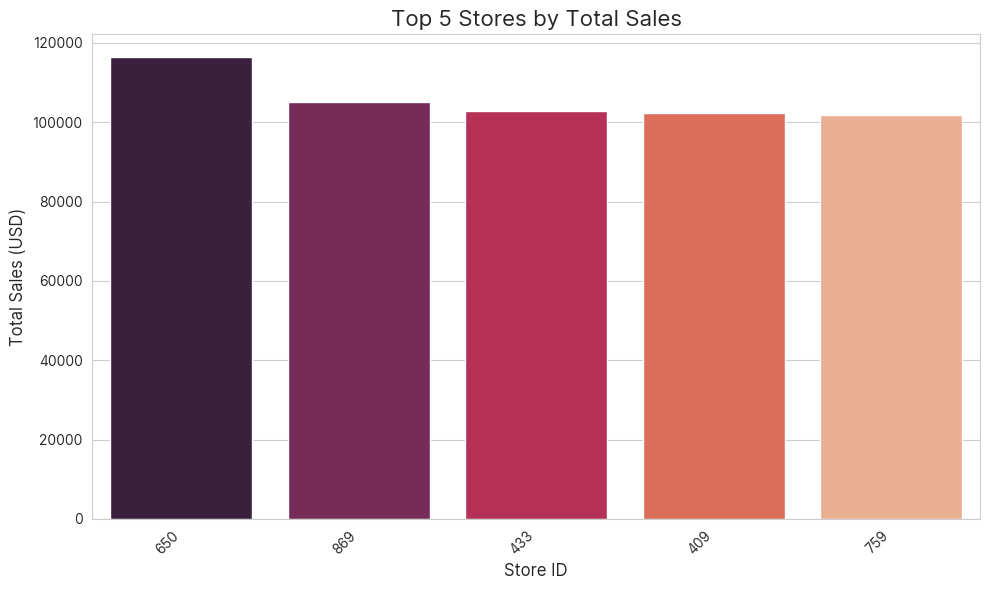


--- Sales vs. Items Available ---


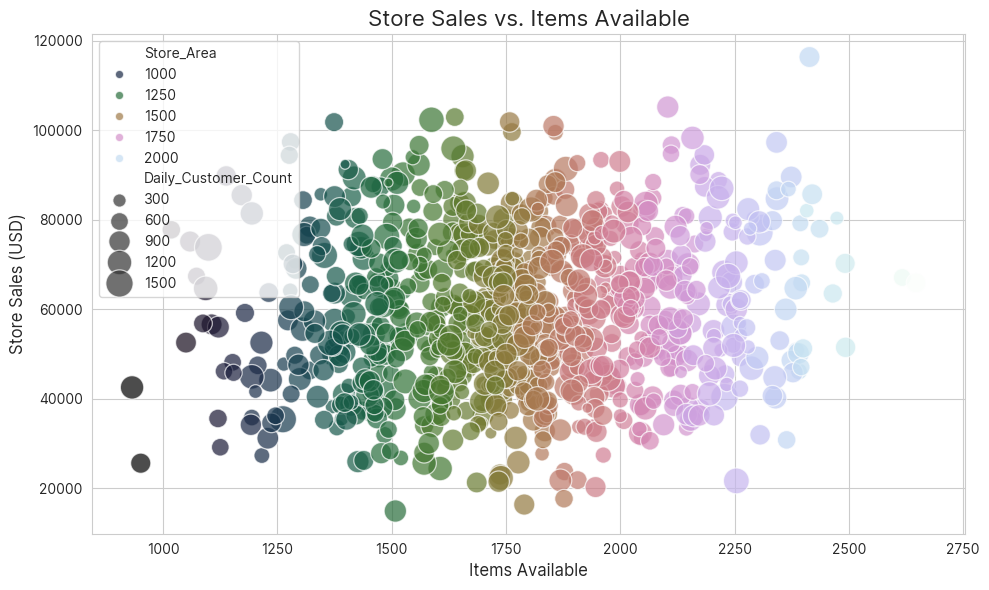


--- Sales vs. Daily Customer Count ---


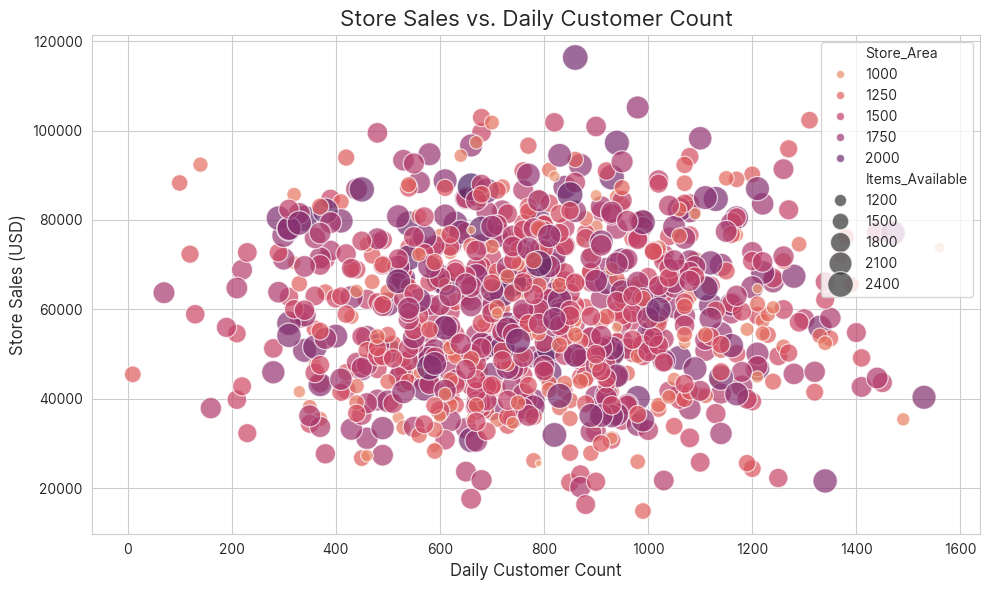


--- Analysis Complete ---
All plots have been generated and saved as PNG files in the 'reports/' directory.
You can now review the insights and prepare your report.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os # Import os module for path manipulation
import sys # Import sys for checking if in interactive mode

# --- Configuration ---
# Set plot style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'Inter'

# --- Path Definitions ---
# Determine the base directory for path calculations
# This handles cases where __file__ might not be defined
try:
    # If running as a script, BASE_DIR is the directory containing this script.
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
    # If main_analysis.py is directly in the project root, then BASE_DIR is the PROJECT_ROOT.
    PROJECT_ROOT = BASE_DIR
except NameError:
    # If __file__ is not defined (e.g., in a Jupyter Notebook cell),
    # assume the current working directory is the project root.
    # This requires the user to launch Jupyter from the project root.
    PROJECT_ROOT = os.getcwd()
    print("Warning: '__file__' not defined. Assuming current working directory is the project root.")
    print(f"Current working directory: {PROJECT_ROOT}")
    print("Please ensure you run the script from the project root (e.g., 'python main_analysis.py' from 'Sales Analysis/').")

# DATA_DIR and REPORTS_DIR are now directly within PROJECT_ROOT
DATA_DIR = os.path.join(PROJECT_ROOT, 'data')
REPORTS_DIR = os.path.join(PROJECT_ROOT, 'reports')

DATA_FILENAME = 'Supermarket Sales Data.csv'
DATA_FILE = os.path.join(DATA_DIR, DATA_FILENAME)

# Ensure report directory exists
os.makedirs(REPORTS_DIR, exist_ok=True)

# --- 1. Data Loading ---
# This function loads the dataset from the specified path.
# It includes error handling for FileNotFoundError and generates mock data if the file is not found.
def load_data(file_path):
    """
    Loads the supermarket sales dataset.
    If the file is not found, it generates a mock DataFrame for demonstration.
    """
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset loaded successfully from {file_path}.")
    except FileNotFoundError:
        print(f"Error: '{file_path}' not found.")
        print(f"Please download the dataset (or ensure it's named '{DATA_FILENAME}') and place it in the '{os.path.basename(DATA_DIR)}/' directory relative to your project root.")
        print("Generating mock data for demonstration purposes...")
        data = {
            'Store ID': np.arange(1, 101),
            'Store_Area': np.random.randint(500, 2000, 100),
            'Items_Available': np.random.randint(500, 5000, 100),
            'Daily_Customer_Count': np.random.randint(100, 1000, 100),
            'Store_Sales': np.random.randint(10000, 100000, 100)
        }
        df = pd.DataFrame(data)
        print("Mock DataFrame created.")
    return df

# --- 2. Data Cleaning and Preprocessing ---
# This function handles data type conversions and extracts new features.
def clean_and_preprocess_data(df):
    """
    Performs data cleaning and preprocessing steps for the new dataset:
    - Checks for missing values.
    - Displays descriptive statistics.
    """
    # Clean column names by stripping whitespace
    df.columns = df.columns.str.strip()

    print("\n--- Data Info Before Cleaning ---")
    df.info()

    # Check for missing values
    print("\nMissing values before cleaning:")
    print(df.isnull().sum())

    # Outlier handling (simple approach: check descriptive statistics)
    print("\n--- Descriptive Statistics ---")
    print(df.describe())

    print("\n--- Data Info After Cleaning ---")
    df.info()
    return df

# --- 3. Exploratory Data Analysis (EDA) and Answering Business Questions ---
# These functions generate specific plots to answer business questions,reinterpreted for the new dataset.

def plot_store_sales_by_id(df):
    """
    Generates a bar plot showing total sales by Store ID.
    Answers: Which store (ID) sells the most?
    Saves the plot to the reports directory.
    """
    print("\n--- Q1: Sales by Store ID ---")
    store_sales = df.groupby('Store ID')['Store_Sales'].sum().sort_values(ascending=False)
    print(store_sales.head()) # Print top few for brevity

    plt.figure(figsize=(14, 7))
    sns.barplot(x=store_sales.index.astype(str), y=store_sales.values, hue=store_sales.index.astype(str), palette='viridis', legend=False)
    plt.title('Total Sales by Store ID', fontsize=16)
    plt.xlabel('Store ID', fontsize=12)
    plt.ylabel('Total Sales (USD)', fontsize=12)
    plt.xticks(rotation=90, ha='right', fontsize=8) # Rotate for many stores
    plt.tight_layout()
    plt.savefig(os.path.join(REPORTS_DIR, 'total_sales_by_store_id.png'))
    plt.show()

def plot_sales_by_store_area(df):
    """
    Generates a bar plot showing total sales by Store Area.
    Answers: How does store area relate to sales? (proxy for "region/profit")
    Saves the plot to the reports directory.
    """
    print("\n--- Q2: Sales by Store Area ---")
    area_sales = df.groupby('Store_Area')['Store_Sales'].sum().sort_values(ascending=False)
    print(area_sales.head())

    plt.figure(figsize=(12, 7))
    sns.barplot(x=area_sales.index.astype(str), y=area_sales.values, hue=area_sales.index.astype(str), palette='magma', legend=False)
    plt.title('Total Sales by Store Area (Size)', fontsize=16)
    plt.xlabel('Store Area', fontsize=12)
    plt.ylabel('Total Sales (USD)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(os.path.join(REPORTS_DIR, 'sales_by_store_area.png'))
    plt.show()

def plot_top_5_stores_by_sales(df):
    """
    Generates a bar plot showing the top 5 stores by total sales.
    Answers: Which are the top 5 stores by revenue?
    Saves the plot to the reports directory.
    """
    print("\n--- Q4: Top 5 Stores by Sales ---")
    top_5_stores = df.groupby('Store ID')['Store_Sales'].sum().nlargest(5)
    print(top_5_stores)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_5_stores.index.astype(str), y=top_5_stores.values, hue=top_5_stores.index.astype(str), palette='rocket', legend=False)
    plt.title('Top 5 Stores by Total Sales', fontsize=16)
    plt.xlabel('Store ID', fontsize=12)
    plt.ylabel('Total Sales (USD)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(os.path.join(REPORTS_DIR, 'top_5_stores_by_sales.png'))
    plt.show()

# --- Additional Analysis Functions ---

def plot_sales_vs_items_available(df):
    """
    Generates a scatter plot to show the relationship between Items Available and Store Sales.
    Saves the plot to the reports directory.
    """
    print("\n--- Sales vs. Items Available ---")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Items_Available', y='Store_Sales', data=df, hue='Store_Area', size='Daily_Customer_Count', sizes=(20, 400), alpha=0.7, palette='cubehelix')
    plt.title('Store Sales vs. Items Available', fontsize=16)
    plt.xlabel('Items Available', fontsize=12)
    plt.ylabel('Store Sales (USD)', fontsize=12)
    plt.tight_layout()
    plt.savefig(os.path.join(REPORTS_DIR, 'sales_vs_items_available.png'))
    plt.show()

def plot_sales_vs_customer_count(df):
    """
    Generates a scatter plot to show the relationship between Daily Customer Count and Store Sales.
    Saves the plot to the reports directory.
    """
    print("\n--- Sales vs. Daily Customer Count ---")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Daily_Customer_Count', y='Store_Sales', data=df, hue='Store_Area', size='Items_Available', sizes=(20, 400), alpha=0.7, palette='flare')
    plt.title('Store Sales vs. Daily Customer Count', fontsize=16)
    plt.xlabel('Daily Customer Count', fontsize=12)
    plt.ylabel('Store Sales (USD)', fontsize=12)
    plt.tight_layout()
    plt.savefig(os.path.join(REPORTS_DIR, 'sales_vs_customer_count.png'))
    plt.show()


# --- Main execution block ---
if __name__ == "__main__":
    print("Starting Supermarket Sales Analysis (Adapted for new dataset)...")

    # Step 1: Load Data
    sales_df = load_data(DATA_FILE)

    if sales_df is not None:
        # Step 2: Clean and Preprocess Data
        processed_df = clean_and_preprocess_data(sales_df)

        # Step 3: Perform EDA and Generate Plots
        print("\n--- Generating Visualizations ---")
        plot_store_sales_by_id(processed_df)
        plot_sales_by_store_area(processed_df)
        plot_top_5_stores_by_sales(processed_df)
        plot_sales_vs_items_available(processed_df)
        plot_sales_vs_customer_count(processed_df)

        print("\n--- Analysis Complete ---")
        print(f"All plots have been generated and saved as PNG files in the '{os.path.basename(REPORTS_DIR)}/' directory.")
        print("You can now review the insights and prepare your report.")
    else:
        print("Data loading failed. Analysis cannot proceed.")
